In [1]:
ls

 驱动器 D 中的卷是 数据
 卷的序列号是 FC9A-7D06

 D:\Code\Python\MOON\MOON 的目录

2023/12/05  15:51    <DIR>          .
2023/12/05  15:48    <DIR>          ..
2023/12/05  15:51    <DIR>          .ipynb_checkpoints
2023/12/05  15:48             5,581 datasets.py
2023/12/05  15:48             1,087 LICENSE
2023/12/05  15:48            31,337 main.py
2023/12/05  15:48            22,807 model.py
2023/12/05  15:48             3,798 README.md
2023/12/05  15:48                54 requirements.txt
2023/12/05  15:48             8,859 resnetcifar.py
2023/12/05  15:51                72 run.ipynb
2023/12/05  15:48            14,343 utils.py
               9 个文件         87,938 字节
               3 个目录 96,784,396,288 可用字节


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!python main.py --dataset=cifar10 \
    --device='cpu' \
    --model=simple-cnn \
    --alg=moon \
    --lr=0.01 \
    --mu=5 \
    --epochs=10 \
    --comm_round=100 \
    --n_parties=10 \
    --partition=noniid \
    --beta=0.5 \
    --logdir='./logs/' \
    --datadir='./data/'

In [ ]:
!python main.py --dataset=cifar10 --model=simple-cnn --alg=moon --lr=0.01 --mu=5 --epochs=20 --comm_round=20 --n_parties=10 --partition=noniid --beta=0.5 

Files already downloaded and verified


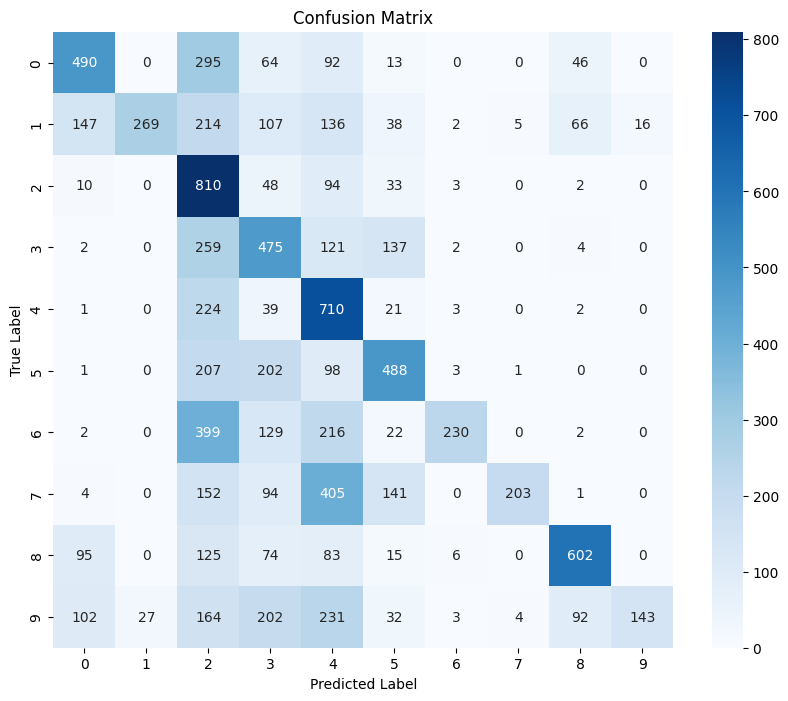

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from model import *
from utils import *

# 定义数据变换
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 下载和加载CIFAR-10数据集
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# 加载预训练的ResNet模型
model = ModelFedCon(base_model = 'simple-cnn', out_dim = 256, n_classes = 10)
model.load_state_dict(torch.load('D:\\Code\\Python\\MOON\\MOON_1\\models\\fedavg\\globalmodelexperiment_log-2023-12-06-1530-43.pth'))
model.eval()

# 遍历测试数据集，获取模型的预测结果和真实标签
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        _,_,out = model(images)
        #print("outputs:",out)
        _, preds = torch.max(out, 1)
        all_preds.append(preds.numpy())
        all_labels.append(labels.numpy())

# 将列表转换为numpy数组
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# 计算混淆矩阵
conf_matrix = confusion_matrix(all_labels, all_preds)

# 可视化混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [2]:
!pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 131.3 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.6 kB 131.3 kB/s eta 0:00:03
   ---- ---------------------------------- 30.7/294.6 kB 131.3 kB/s eta 0:00:03
   ----- --------------------------------- 41.0/294.6 kB 122.9 kB/s eta 0:00:03
   -------- ------------------------------ 61.4/294.6 kB 172.4 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/294.6 kB 171.1 kB/s eta 0:00:02
   -------------- ----------------------- 112.6/294.6 kB 242.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.6 kB 248.7 kB/s eta 0:00:01
  

Files already downloaded and verified


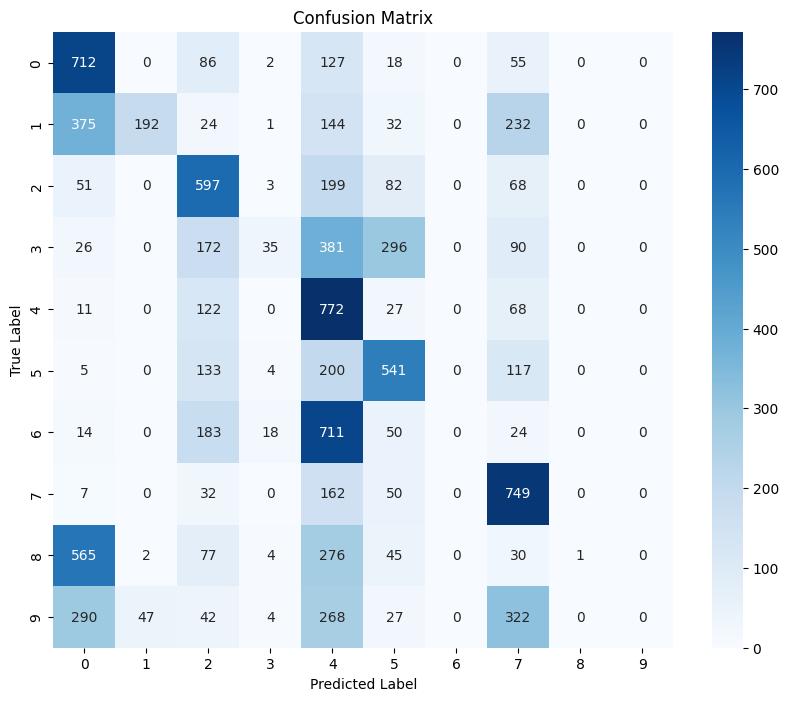

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from model import *
from utils import *

# 定义数据变换
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# 下载和加载CIFAR-10数据集
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# 加载预训练的ResNet模型
model = ModelFedCon(base_model = 'simple-cnn', out_dim = 256, n_classes = 10)
model.load_state_dict(torch.load('D:\\Code\\Python\\MOON\\MOON_1\\models\\fedavg\\localmodel0experiment_log-2023-12-06-1530-43.pth'))
model.eval()

# 遍历测试数据集，获取模型的预测结果和真实标签
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        _,_,out = model(images)
        #print("outputs:",out)
        _, preds = torch.max(out, 1)
        all_preds.append(preds.numpy())
        all_labels.append(labels.numpy())

# 将列表转换为numpy数组
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# 计算混淆矩阵
conf_matrix = confusion_matrix(all_labels, all_preds)

# 可视化混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Files already downloaded and verified


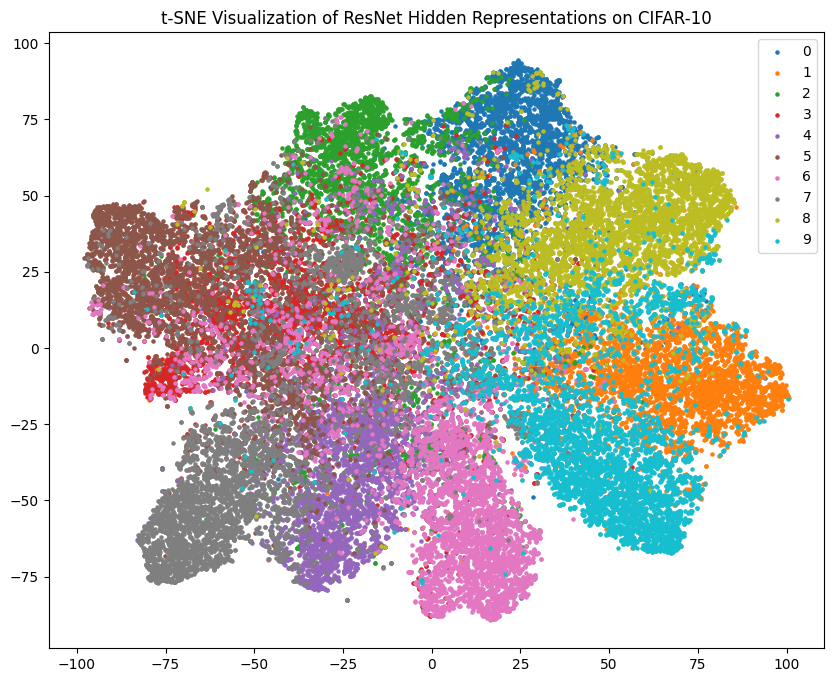

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from model import *
from utils import *

# 定义数据变换
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[x / 255.0 for x in [125.3, 123.0, 113.9]],
                                             std=[x / 255.0 for x in [63.0, 62.1, 66.7]])
])

# 下载和加载CIFAR-10数据集
testset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# 加载预训练的ResNet模型
model = ModelFedCon(base_model = 'simple-cnn', out_dim = 256, n_classes = 10)
model.load_state_dict(torch.load('D:\\Code\\Python\\MOON\\MOON_1\\models\\fedavg\\globalmodelexperiment_log-2023-12-06-1530-43.pth'))
model = nn.Sequential(*list(model.children())[:-1])
model.eval()

# 遍历测试数据集，获取模型的隐藏层表征
all_hidden_representations = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        hidden_representations = model(images)
        all_hidden_representations.append(hidden_representations.view(hidden_representations.size(0), -1).numpy())
        all_labels.append(labels.numpy())

# 将列表转换为numpy数组
all_hidden_representations = np.concatenate(all_hidden_representations, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
reduced_representation = tsne.fit_transform(all_hidden_representations)

# 可视化t-SNE降维后的结果
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(reduced_representation[all_labels == i, 0], reduced_representation[all_labels == i, 1], label=str(i), s=5)

plt.title('t-SNE Visualization of ResNet Hidden Representations on CIFAR-10')
plt.legend()
plt.show()

Files already downloaded and verified


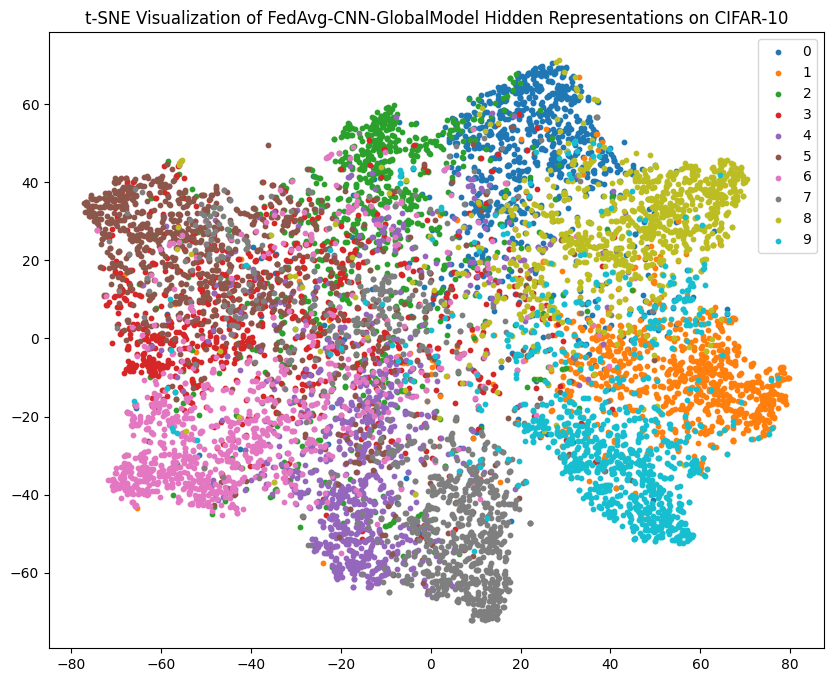

In [27]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from model import *
from utils import *

# 定义数据变换
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[x / 255.0 for x in [125.3, 123.0, 113.9]],
                                             std=[x / 255.0 for x in [63.0, 62.1, 66.7]])
])

# 下载和加载CIFAR-10数据集
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# 加载预训练的模型
model = ModelFedCon(base_model = 'simple-cnn', out_dim = 256, n_classes = 10)
model.load_state_dict(torch.load('D:\\Code\\Python\\MOON\\MOON_1\\models\\fedavg\\globalmodelexperiment_log-2023-12-06-1530-43.pth'))
model = nn.Sequential(*list(model.children())[:-1])
model.eval()

# 遍历测试数据集，获取模型的隐藏层表征
all_hidden_representations = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        hidden_representations = model(images)
        all_hidden_representations.append(hidden_representations.view(hidden_representations.size(0), -1).numpy())
        all_labels.append(labels.numpy())

# 将列表转换为numpy数组
all_hidden_representations = np.concatenate(all_hidden_representations, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
reduced_representation = tsne.fit_transform(all_hidden_representations)

# 可视化t-SNE降维后的结果
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(reduced_representation[all_labels == i, 0], reduced_representation[all_labels == i, 1], label=str(i), s=10)

plt.title('t-SNE Visualization of FedAvg-CNN-GlobalModel Hidden Representations on CIFAR-10')
plt.legend()
plt.show()

Files already downloaded and verified


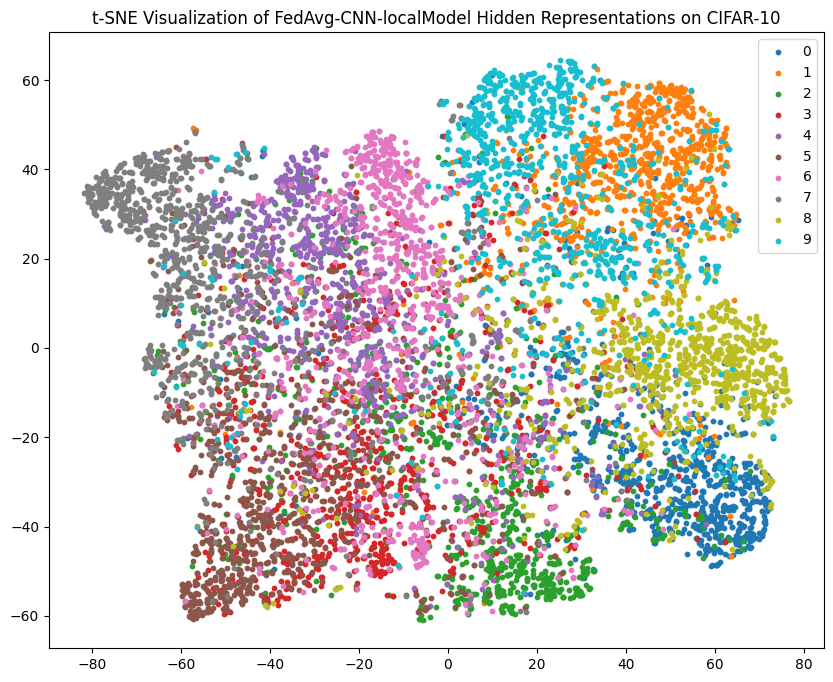

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from model import *
from utils import *

# 定义数据变换
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[x / 255.0 for x in [125.3, 123.0, 113.9]],
                                             std=[x / 255.0 for x in [63.0, 62.1, 66.7]])
])

# 下载和加载CIFAR-10数据集
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# 加载预训练的ResNet模型
model = ModelFedCon(base_model = 'simple-cnn', out_dim = 256, n_classes = 10)
model.load_state_dict(torch.load('D:\\Code\\Python\\MOON\\MOON_1\\models\\fedavg\\localmodel0experiment_log-2023-12-06-1530-43.pth'))
model = nn.Sequential(*list(model.children())[:-1])
model.eval()

# 遍历测试数据集，获取模型的隐藏层表征
all_hidden_representations = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        hidden_representations = model(images)
        all_hidden_representations.append(hidden_representations.view(hidden_representations.size(0), -1).numpy())
        all_labels.append(labels.numpy())

# 将列表转换为numpy数组
all_hidden_representations = np.concatenate(all_hidden_representations, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
reduced_representation = tsne.fit_transform(all_hidden_representations)

# 可视化t-SNE降维后的结果
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(reduced_representation[all_labels == i, 0], reduced_representation[all_labels == i, 1], label=str(i), s=10)

plt.title('t-SNE Visualization of FedAvg-CNN-localModel Hidden Representations on CIFAR-10')
plt.legend()
plt.show()

Files already downloaded and verified


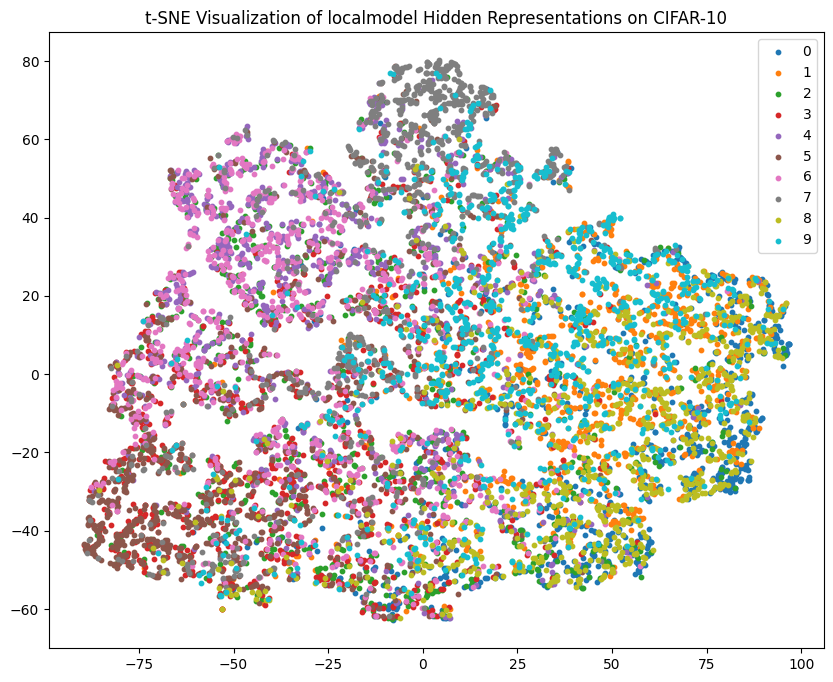

In [26]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from model import *
from utils import *

# 定义数据变换
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[x / 255.0 for x in [125.3, 123.0, 113.9]],
                                             std=[x / 255.0 for x in [63.0, 62.1, 66.7]])
])

# 下载和加载CIFAR-10数据集
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# 加载预训练的ResNet模型
model = ModelFedCon(base_model = 'simple-cnn', out_dim = 256, n_classes = 10)
model.load_state_dict(torch.load('D:\\Code\\Python\\MOON\\MOON_1\\models\\localmodel\\model0experiment_log-2023-12-08-1935-59.pth'))
model = nn.Sequential(*list(model.children())[:-1])
model.eval()

# 遍历测试数据集，获取模型的隐藏层表征
all_hidden_representations = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        hidden_representations = model(images)
        all_hidden_representations.append(hidden_representations.view(hidden_representations.size(0), -1).numpy())
        all_labels.append(labels.numpy())

# 将列表转换为numpy数组
all_hidden_representations = np.concatenate(all_hidden_representations, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
reduced_representation = tsne.fit_transform(all_hidden_representations)

# 可视化t-SNE降维后的结果
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(reduced_representation[all_labels == i, 0], reduced_representation[all_labels == i, 1], label=str(i), s=10)

plt.title('t-SNE Visualization of Localmodel Hidden Representations on CIFAR-10')
plt.legend()
plt.show()

Files already downloaded and verified


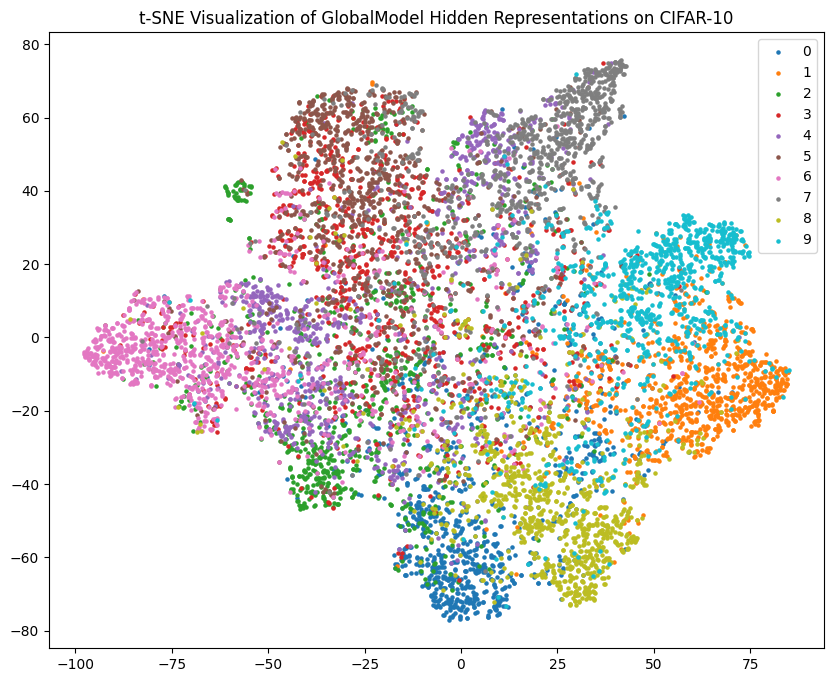

In [28]:
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from model import *
from utils import *

# 定义数据变换
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[x / 255.0 for x in [125.3, 123.0, 113.9]],
                                             std=[x / 255.0 for x in [63.0, 62.1, 66.7]])
])

# 下载和加载CIFAR-10数据集
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# 加载预训练的ResNet模型
model = ModelFedCon(base_model = 'simple-cnn', out_dim = 256, n_classes = 10)
model.load_state_dict(torch.load('D:\\Code\\Python\\MOON\\MOON_1\\models\\all_in\\experiment_log-2023-12-08-1950-52.pth'))
model = nn.Sequential(*list(model.children())[:-1])
model.eval()

# 遍历测试数据集，获取模型的隐藏层表征
all_hidden_representations = []
all_labels = []

with torch.no_grad():
    for images, labels in testloader:
        hidden_representations = model(images)
        all_hidden_representations.append(hidden_representations.view(hidden_representations.size(0), -1).numpy())
        all_labels.append(labels.numpy())

# 将列表转换为numpy数组
all_hidden_representations = np.concatenate(all_hidden_representations, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
reduced_representation = tsne.fit_transform(all_hidden_representations)

# 可视化t-SNE降维后的结果
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(reduced_representation[all_labels == i, 0], reduced_representation[all_labels == i, 1], label=str(i), s=5)

plt.title('t-SNE Visualization of GlobalModel Hidden Representations on CIFAR-10')
plt.legend()
plt.show()